<a href="https://colab.research.google.com/github/mmalinda/DS-Prep/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_11_Mutanu_Malinda_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Data

In [0]:
# Importing the packages needed for this analysis
import pandas as pd

import numpy as np

In [6]:
# Loading the dataset
df = pd.read_csv('http://bit.ly/autolib_dataset', encoding = 'latin1')

# Viewing the first 10 rows of data
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃÂ¨s 37 rue L...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃÂ«n CÃÂ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃÂ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [7]:
# Previewing a random subset of the data 
df.take(np.random.permutation(len(df))[:10])

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
3567,133 rue Saint Jacques,2,2,0,0,1,operational,Paris,NaN,paris-saintjacques-133,STATION,"48.8469, 2.343399",75005,Paris/Saint Jacques/133,operational,NaN,2,station,ok,nonexistent,2018,4,4,14,39
1838,16 rue du TÃÂ©lÃÂ©graphe,5,5,0,0,0,operational,Paris,NaN,paris-telegraphe-16,STATION,"48.8723314, 2.3995098",75020,Paris/TÃÂ©lÃÂ©graphe/16,operational,NaN,0,station,ok,nonexistent,2018,4,6,18,32
50,2 bis Place du 8 mai 1945,4,4,0,1,0,nonexistent,Rueil-Malmaison,NaN,rueilmalmaison-8mai1945-2,STATION,"48.8713591, 2.20283",92500,Rueil-Malmaison/8 mai 1945/2,operational,NaN,0,station,ok,nonexistent,2018,4,6,3,52
3222,99 Boulevard Arago,1,1,2,0,0,nonexistent,Paris,NaN,paris-arago-99,STATION,"48.834286, 2.3338533",75014,Paris/Arago/99,operational,NaN,1,station,ok,nonexistent,2018,4,6,21,13
2471,3 place Richelieu,3,3,0,0,0,nonexistent,Rueil-Malmaison,NaN,rueilmalmaison-richelieu-3,STATION,"48.87339, 2.182237",92500,Rueil-Malmaison/Richelieu/3,operational,NaN,2,station,ok,nonexistent,2018,4,3,13,33
1503,245 boulevard Jean JaurÃÂ¨s,6,6,0,0,0,nonexistent,Boulogne-Billancourt,NaN,boulognebillancourt-jeanjaures-245,STATION,"48.82851, 2.246519",92100,Boulogne-Billancourt/Jean JaurÃÂ¨s/245,operational,NaN,0,station,ok,nonexistent,2018,4,4,6,30
3929,5 rue des Ecoles,4,4,0,1,0,nonexistent,Nanterre,NaN,nanterre-ecoles-5,STATION,"48.886678, 2.220199",92000,Nanterre/Ecoles/5,operational,NaN,0,station,ok,nonexistent,2018,4,6,4,7
3108,30 rue Marcel Vigneron,5,5,0,1,0,nonexistent,Arcueil,NaN,arcueil-marcelvigneron-30,STATION,"48.80365, 2.342448",94110,Arcueil/Marcel Vigneron/30,operational,NaN,0,station,ok,nonexistent,2018,4,8,14,11
3367,3 Rue Camille Desmoulins,3,3,0,0,0,nonexistent,Cachan,NaN,cachan-camilledesmoulins-3,SPACE,"48.7942674, 2.3345857",94230,Cachan/Camille Desmoulins/3,operational,NaN,0,full_station,ok,operational,2018,4,2,19,59
4187,Place Montgolfier - Parking Montgolfier,1,1,0,0,0,nonexistent,Saint-Maurice,NaN,saintmaurice-montgolfier-parking,PARKING,"48.81503, 2.45917",94410,Saint-Maurice/Montgolfier/Parking,operational,NaN,5,station,ok,nonexistent,2018,4,2,17,19


In [8]:
# Getting more information on the format of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   

# Data Validity

In [10]:
# The "Cars" attribute is redundant with the "Bluecar counter" attribute, as stated in the dataset description
# Dropping the Cars column
df = df.drop (['Cars'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
Address                5000 non-null object
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   5000 non-null int64
month                  

In [0]:
# Removing any white space in the dataset
df = df.applymap(lambda x: x.strip() if isinstance (x, str) else x)

In [0]:
# Removing white spaces in columns wih numeric values
#df = df[df[['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter', 'Charge Slots', 'Slots', 'year', 'month', 'day', 'hour', 'minute']].replace(" ", "")]
#print(df)

In [12]:
# Viewing the missing values in each column
df.isnull().sum()

Address                   0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [13]:
# Viewing the type of data in the "Displayed comment" attribute
# This is to check if the data is important for this analysis
df['Displayed comment'].unique()

array([nan, 'Station en parking (niv -1), accÃ\x83Â¨s 37 rue Leblanc',
       'Station en parking (niv 0), accÃ\x83Â¨s 26 villa Croix Nivert',
       'Station en parking (niv -2), accÃ\x83Â¨s 4 av. Foch',
       "Borne d'abonnement en sous-sol (niv -1), accÃ\x83Â¨s 4 rue Lobau",
       'Station en parking (niv -1), accÃ\x83Â¨s rue Wilson',
       'Station en parking (niv -1), accÃ\x83Â¨s Place Georges Pompidou',
       'Station en parking (niv -3), accÃ\x83Â¨s 32 rue dÃ¢Â\x80Â\x99Alsace',
       'Station en parking (niv -2), accÃ\x83Â¨s 2 avenue Gabriel',
       'Station en parking (niv -1), accÃ\x83Â¨s av. de Versailles',
       'Station en parking (niv -1), accÃ\x83Â¨s rue Abel Gance',
       'Station en parking (niv -1), accÃ\x83Â¨s 4 av. des Ternes',
       'Station en parking (niv -1), Station B (sur la droite)',
       'Station en parking',
       'Station en parking (niv -2), accÃ\x83Â¨s 125 bvd du Montparnasse',
       'Station en parking (niv -1), Station A (sur la gauche)',
 

This data is not relevant for the analysis

In [14]:
# Viewing the type of data in the "Scheduled at" attribute
# This is to check if the data is important for this analysis
df['Scheduled at'].unique()

array([nan, '2016-07-27T15:32:21', '2016-07-05T13:10:09',
       '2015-09-29T13:58:29', '2016-04-26T14:28:01',
       '2012-09-17T08:57:28', '2016-01-06T10:35:38',
       '2018-01-03T10:52:00', '2016-07-27T15:32:22'], dtype=object)

This data is not relevant for the analysis.

In [15]:
# Dropping the irrelevant attributes

df = df.drop(["Displayed comment", "Scheduled at"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Address                5000 non-null object
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   5000 non-null int64
month                  5000 non-null int64
day                    5000 non-null int64
hour                  

In [16]:
# Checking for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Bluecar counter           4.0
Utilib counter            0.0
Utilib 1.4 counter        0.0
Charge Slots              0.0
Postal code           17308.0
Slots                     3.0
year                      0.0
month                     0.0
day                       4.0
hour                     12.0
minute                   30.0
dtype: float64


Address                  0
Bluecar counter          0
Charge Slots           994
Charging Status          0
City                     0
Geo point                0
ID                       0
Kind                     0
Postal code              0
Public name              0
Rental status            0
Slots                    0
Station type             0
Status                   0
Subscription status      0
Utilib 1.4 counter     569
Utilib counter         286
day                      0
hour                     0
minute                   0
month                    0
year                     0
dtype: int64

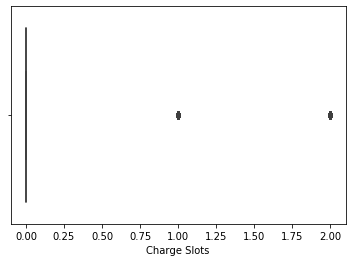

In [17]:
# Boxplot for Charge Slots to visualize outliers
import seaborn as sns

sns.boxplot(x = df['Charge Slots'])

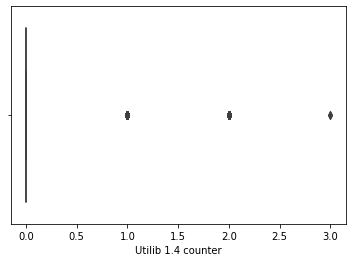

In [18]:
# Boxplot for Utilib 1.4 counter to visualize outliers
import seaborn as sns

sns.boxplot(x = df['Utilib 1.4 counter'])

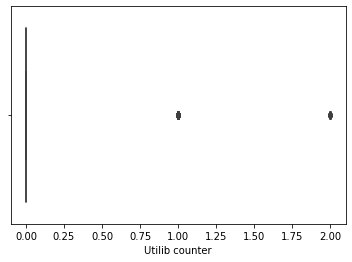

In [19]:
# Boxplot for Utilib 1.4 counter to visualize outliers
import seaborn as sns

sns.boxplot(x = df['Utilib counter'])

Outliers seem to be in columns where the mode and IQR are 0 so I will not remove them.

# Data Accuracy

In [20]:
# Checking that charge slots > 1 only when charging status is "operational" 
df[(df['Charge Slots'] > 1) & (df['Charging Status'] != 'operational')]

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute


In [21]:
# Selecting stations with no resources 
a = df[(df['Bluecar counter'] == 0) & (df['Utilib 1.4 counter'] == 0) & (df['Utilib counter'] == 0) & (df['Charge Slots'] == 0) & (df['Slots'] == 0)]
a

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
6,37 rue Leblanc,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃÂ«n CÃÂ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20
13,34 avenue Jean Moulin,0,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,0,station,ok,nonexistent,2018,4,8,21,54
29,35 rue de Boucry,0,0,0,0,broken,Paris,paris-boucry-35,STATION,"48.895148, 2.3595823",75018,Paris/Boucry/35,broken,0,station,closed,nonexistent,2018,4,8,2,29
46,81 avenue de la Grande ArmÃÂ©e,0,0,0,0,broken,Paris,paris-grandearmee-81,STATION,"48.87678, 2.284807",75016,Paris/Grande ArmÃÂ©e/81,broken,0,station,closed,nonexistent,2018,4,6,21,2
68,6 avenue Foch,0,0,0,0,nonexistent,Paris,paris-etoilefoch-parking,PARKING,"48.87366, 2.29201",75016,Paris/Etoile Foch/Parking,broken,0,station,closed,nonexistent,2018,4,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6 avenue Foch,0,0,0,0,nonexistent,Paris,paris-etoilefoch-parking,PARKING,"48.87366, 2.29201",75016,Paris/Etoile Foch/Parking,broken,0,station,closed,nonexistent,2018,4,3,14,37
4960,1 rue Pierre Chausson,0,0,0,0,nonexistent,Paris,paris-pierrechausson-1,STATION,"48.8702567, 2.3600462",75010,Paris/Pierre Chausson/1,broken,0,station,closed,nonexistent,2018,4,8,19,0
4961,69 boulevard Pasteur,0,0,0,0,nonexistent,Paris,paris-pasteur2-parking,PARKING,"48.84064, 2.3148",75015,Paris/Pasteur 2/Parking,broken,0,station,closed,nonexistent,2018,4,7,21,8
4975,91 Rue du Faubourg Saint-HonorÃÂ©,0,0,0,0,broken,Paris,paris-sainthonore-91,STATION,"48.872047, 2.3131252",75008,Paris/Saint-HonorÃÂ©/91,broken,0,station,closed,nonexistent,2018,4,3,1,21


In [22]:
# Checking that slots and vehicles are not available at stations with no resources
a.sum()

Address                37 rue Leblanc34 avenue Jean Moulin35 rue de B...
Bluecar counter                                                        0
Utilib counter                                                         0
Utilib 1.4 counter                                                     0
Charge Slots                                                           0
Charging Status        nonexistentnonexistentbrokenbrokennonexistentn...
City                   ParisParisParisParisParisParisParisVanvesChÃÂ...
ID                     paris-citroencevennes-parkingparis-jeanmoulin-...
Kind                   PARKINGSTATIONSTATIONSTATIONPARKINGPARKINGSTAT...
Geo point              48.83874, 2.2764148.8266807, 2.323735548.89514...
Postal code                                                     34487280
Public name            Paris/CitroÃÂ«n CÃÂ©vennes/ParkingParis/Jean...
Rental status          brokenoperationalbrokenbrokenbrokenbrokenopera...
Slots                                              

In [23]:
# Checking that stations of Kind "CENTER" have no resources (Bluecar, Utilib, Utilib 1.4, Charge slots, Slots)
df[df['Kind'] == 'CENTER'].sum()

Address                20 Quai de la MÃÂ©gisserie20 Quai de la MÃÂ©...
Bluecar counter                                                        0
Utilib counter                                                         0
Utilib 1.4 counter                                                     0
Charge Slots                                                           0
Charging Status                        nonexistentnonexistentnonexistent
City                                                     ParisParisParis
ID                     paris-megisserie-20paris-megisserie-20paris-me...
Kind                                                  CENTERCENTERCENTER
Geo point              48.858271, 2.3434548.858271, 2.3434548.858271,...
Postal code                                                       225003
Public name            Paris/Megisserie/20Paris/Megisserie/20Paris/Me...
Rental status                          nonexistentnonexistentnonexistent
Slots                                              

In [24]:
# Checking that stations of Kind "PARKING" do not have charge slots
df[df['Kind'] == 'PARKING'].sum()

Address                6 avenue de la Porte de Champerret37 rue Lebla...
Bluecar counter                                                      378
Utilib counter                                                         8
Utilib 1.4 counter                                                    23
Charge Slots                                                           0
Charging Status        nonexistentnonexistentnonexistentnonexistentno...
City                   ParisParisParisParisParisParisParisParisParisL...
ID                     paris-portedechamperret-6paris-citroencevennes...
Kind                   PARKINGPARKINGPARKINGPARKINGPARKINGPARKINGPARK...
Geo point              48.8862632, 2.287451148.83874, 2.2764148.88267...
Postal code                                                     18138650
Public name            Paris/Porte de Champerret/6Paris/CitroÃÂ«n CÃ...
Rental status          operationalbrokenoperationaloperationaloperati...
Slots                                              

In [25]:
# Checking that stations with Rental status as "broken" do not have resources other than slots
df[df['Rental status'] == "broken"].sum()

Address                37 rue Leblanc35 rue de Boucry81 avenue de la ...
Bluecar counter                                                        0
Utilib counter                                                         0
Utilib 1.4 counter                                                     0
Charge Slots                                                           0
Charging Status        nonexistentbrokenbrokennonexistentnonexistentn...
City                   ParisParisParisParisParisVanvesChÃÂ¢tenay-Mal...
ID                     paris-citroencevennes-parkingparis-boucry-35pa...
Kind                   PARKINGSTATIONSTATIONPARKINGPARKINGSTATIONSTAT...
Geo point              48.83874, 2.2764148.895148, 2.359582348.87678,...
Postal code                                                     27746542
Public name            Paris/CitroÃÂ«n CÃÂ©vennes/ParkingParis/Bouc...
Rental status          brokenbrokenbrokenbrokenbrokenbrokenbrokenbrok...
Slots                                              

# Data Completeness

In [26]:
# Counting missing values
df.isnull().sum()

Address                0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

# Data Consistency

In [27]:
# Checking for duplicates
df.duplicated().sum()

0

# Uniformity

In [49]:
# Standardization - removing spaces and punctuation from column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_')
df.head()

,address,bluecar_counter,utilib_counter,utilib_1_4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


# Analysis

In [50]:
# Select records for stations in Paris
df_p = df[df['city'] == 'Paris']

df_p.head(10)

,address,bluecar_counter,utilib_counter,utilib_1_4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃÂ¨ne OudinÃÂ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃÂ¨ne OudinÃÂ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃÂ«n CÃÂ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20
8,34 avenue Jean Moulin,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2
10,14 rue Censier,0,0,0,2,operational,Paris,paris-censier-14,STATION,"48.8411067, 2.3544235",75005,Paris/Censier/14,operational,6,station,ok,nonexistent,2018,4,1,4,39
12,6 avenue de la Porte de Champerret,5,1,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,0,station,ok,nonexistent,2018,4,5,12,22


In [51]:
# Selecting attributes needed to answer the first question
df_p = df_p[['id', 'city', 'bluecar_counter', 'year', 'month', 'day', 'hour', 'minute']]
df_p.head(60)

,id,city,bluecar_counter,year,month,day,hour,minute
0,paris-suffren-2,Paris,0,2018,4,8,11,43
1,paris-raymondlosserand-145,Paris,6,2018,4,6,7,24
3,paris-eugeneoudine-51,Paris,3,2018,4,4,4,37
4,paris-portedechamperret-6,Paris,3,2018,4,8,17,23
5,paris-voltaire-8,Paris,0,2018,4,6,7,2
6,paris-citroencevennes-parking,Paris,0,2018,4,8,18,20
8,paris-jeanmoulin-34,Paris,1,2018,4,2,22,58
9,paris-anvers-parking,Paris,6,2018,4,4,15,2
10,paris-censier-14,Paris,0,2018,4,1,4,39
12,paris-portedechamperret-6,Paris,5,2018,4,5,12,22


In [52]:
# Creating a timestamp variable
df_p['datetime'] = pd.to_datetime(df_p[['year','month','day','hour','minute']])
df_p.head()

,id,city,bluecar_counter,year,month,day,hour,minute,datetime
0,paris-suffren-2,Paris,0,2018,4,8,11,43,2018-04-08 11:43:00
1,paris-raymondlosserand-145,Paris,6,2018,4,6,7,24,2018-04-06 07:24:00
3,paris-eugeneoudine-51,Paris,3,2018,4,4,4,37,2018-04-04 04:37:00
4,paris-portedechamperret-6,Paris,3,2018,4,8,17,23,2018-04-08 17:23:00
5,paris-voltaire-8,Paris,0,2018,4,6,7,2,2018-04-06 07:02:00


In [53]:
# Calculating the change in cars available at each time point
df_p['car_diff'] = df_p.sort_values(['datetime']).groupby(['id']).bluecar_counter.apply(lambda x: x - x.shift(1))
df_p.head(20)

,id,city,bluecar_counter,year,month,day,hour,minute,datetime,car_diff
0,paris-suffren-2,Paris,0,2018,4,8,11,43,2018-04-08 11:43:00,0.0
1,paris-raymondlosserand-145,Paris,6,2018,4,6,7,24,2018-04-06 07:24:00,2.0
3,paris-eugeneoudine-51,Paris,3,2018,4,4,4,37,2018-04-04 04:37:00,0.0
4,paris-portedechamperret-6,Paris,3,2018,4,8,17,23,2018-04-08 17:23:00,-1.0
5,paris-voltaire-8,Paris,0,2018,4,6,7,2,2018-04-06 07:02:00,0.0
6,paris-citroencevennes-parking,Paris,0,2018,4,8,18,20,2018-04-08 18:20:00,0.0
8,paris-jeanmoulin-34,Paris,1,2018,4,2,22,58,2018-04-02 22:58:00,-2.0
9,paris-anvers-parking,Paris,6,2018,4,4,15,2,2018-04-04 15:02:00,2.0
10,paris-censier-14,Paris,0,2018,4,1,4,39,2018-04-01 04:39:00,NaN
12,paris-portedechamperret-6,Paris,5,2018,4,5,12,22,2018-04-05 12:22:00,0.0


In [54]:
# Ordering the table by station ID and timestamp
df_p = df_p.groupby(["id"]).apply(lambda x: x.sort_values(['datetime']))
df_p.head(20)

id  ... car_diff
id                                               ...         
paris-25aout1944-8   710     paris-25aout1944-8  ...      NaN
                     1891    paris-25aout1944-8  ...      3.0
                     2312    paris-25aout1944-8  ...     -2.0
                     911     paris-25aout1944-8  ...      1.0
                     4940    paris-25aout1944-8  ...     -2.0
                     2306    paris-25aout1944-8  ...      0.0
                     2848    paris-25aout1944-8  ...     -1.0
                     586     paris-25aout1944-8  ...      1.0
paris-adolphemax-6   4459    paris-adolphemax-6  ...      NaN
                     294     paris-adolphemax-6  ...     -4.0
                     573     paris-adolphemax-6  ...      0.0
paris-adolphemille-8 3883  paris-adolphemille-8  ...      NaN
                     1424  paris-adolphemille-8  ...      1.0
                     4343  paris-adolphemille-8  ...      2.0
                     2738  paris-adolphemille-8  ...     -2.0
                     778   paris-adolphemille-8  ...     -2.0
                     2350  paris-adolphemille-8  ...      0.0
                     2496  paris-adolphemille-8  ...      1.0
paris-adolpheyvon-6  3350   paris-adolpheyvon-6  ...      NaN
                     3015   paris-adolpheyvon-6  ...      1.0

[20 rows x 10 columns]

In [0]:

df_p['pick_up'] = df_p[df_p['car_diff'] < 0].car_diff.abs()

In [75]:
# Creating a new attribute for pick-ups only
df_p['pick_up'] = df_p[df_p['car_diff'] < 0].car_diff.abs()
df_p.head(15)

id   city  ...  car_diff  pick_up
id                                                      ...                   
paris-25aout1944-8   710     paris-25aout1944-8  Paris  ...       NaN      NaN
                     1891    paris-25aout1944-8  Paris  ...       3.0      NaN
                     2312    paris-25aout1944-8  Paris  ...      -2.0      2.0
                     911     paris-25aout1944-8  Paris  ...       1.0      NaN
                     4940    paris-25aout1944-8  Paris  ...      -2.0      2.0
                     2306    paris-25aout1944-8  Paris  ...       0.0      NaN
                     2848    paris-25aout1944-8  Paris  ...      -1.0      1.0
                     586     paris-25aout1944-8  Paris  ...       1.0      NaN
paris-adolphemax-6   4459    paris-adolphemax-6  Paris  ...       NaN      NaN
                     294     paris-adolphemax-6  Paris  ...      -4.0      4.0
                     573     paris-adolphemax-6  Paris  ...       0.0      NaN
paris-adolphemille-8 3883  paris-adolphemille-8  Paris  ...       NaN      NaN
                     1424  paris-adolphemille-8  Paris  ...       1.0      NaN
                     4343  paris-adolphemille-8  Paris  ...       2.0      NaN
                     2738  paris-adolphemille-8  Paris  ...      -2.0      2.0

[15 rows x 11 columns]

In [87]:
# Showing the most popular hour for pick-up
print(df_p.groupby(['hour'])['pick_up'].sum().sort_values(ascending = False)[:1])

hour
21    109.0
Name: pick_up, dtype: float64


The most popular hour for pick-up is 8pm - 9pm

In [115]:
a.columns

Index(['address', 'bluecar_counter', 'utilib_counter', 'utilib_1_4_counter',
       'city', 'id', 'postal_code', 'year', 'month', 'day', 'hour', 'minute',
       'datetime', 'car_diff', 'pick_up', 'total_activity'],
      dtype='object')

In [117]:
# Creating a dataframe to answer the rest of the questions
a = df[['address', 'bluecar_counter', 'utilib_counter', 'utilib_1_4_counter', 'city', 'id',
       'postal_code', 'year', 'month', 'day', 'hour', 'minute']]

a['datetime'] = pd.to_datetime(a[['year','month','day','hour','minute']])

a['bluecar_diff'] = a.sort_values(['datetime']).groupby(['id']).bluecar_counter.apply(lambda x: x - x.shift(1))

a['utilib_diff'] = a.sort_values(['datetime']).groupby(['id']).utilib_counter.apply(lambda x: x - x.shift(1))

a['utilib_1_4_diff'] = a.sort_values(['datetime']).groupby(['id']).utilib_1_4_counter.apply(lambda x: x - x.shift(1))

a = a.groupby(["id"]).apply(lambda x: x.sort_values(['datetime']))

a['bluecar_pick_up'] = a[a['bluecar_diff'] < 0].bluecar_diff.abs()

a['total_diff'] = a['bluecar_diff'].abs() + a['utilib_diff'].abs() + a['utilib_1_4_diff'].abs()

a.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

address  ...  total_diff
id                                                             ...            
alfortville-blanqui-61         1352           61 quai Blanqui  ...         NaN
                               4528           61 quai Blanqui  ...         0.0
                               4880           61 quai Blanqui  ...         0.0
                               1693           61 quai Blanqui  ...         0.0
alfortville-charlesdegaulle-16 4424  16 Rue Charles de Gaulle  ...         NaN
                               1843  16 Rue Charles de Gaulle  ...         2.0
                               4986  16 Rue Charles de Gaulle  ...         1.0
                               2677  16 Rue Charles de Gaulle  ...         1.0
                               3218  16 Rue Charles de Gaulle  ...         2.0
alfortville-etiennedolet-174   3642     174 rue Etienne Dolet  ...         NaN

[10 rows x 18 columns]

In [118]:
# Finding out what station is the most popular overall
print(a.groupby(a['id']).total_diff.sum().sort_values(ascending = False)[:1])

id
paris-portedemontrouge-8    45.0
Name: total_diff, dtype: float64


The most popular station is paris-portedemontrouge-8.

In [119]:
# Finding out what station is most popular at the most popular picking hour?
print(a[a['hour'] == 21].groupby(a['id']).total_diff.sum().sort_values(ascending = False)[:1])

id
paris-saintmande-94    8.0
Name: total_diff, dtype: float64


The most popular station at 8pm to 9pm is paris-saintmande-94

In [121]:
# What postal code is the most popular for picking up Bluecars? 
print(a.groupby(a['postal_code']).bluecar_pick_up.sum().sort_values(ascending = False)[:1])

postal_code
75015    175.0
Name: bluecar_pick_up, dtype: float64


The most popular postal code for picking up Bluecars is 75015

In [109]:
# Does the most popular station belong to that postal code?
df[df['id'] == "paris-saintmande-94"].postal_code

246     75012
800     75012
1955    75012
2253    75012
3773    75012
Name: postal_code, dtype: int64

The most popular station does not belong to the most popular postcode for picking up Bluecars.

In [122]:
# What postal code is the most popular at the most popular picking hour?
print(a[a['hour'] == 21].groupby(a['postal_code']).total_diff.sum().sort_values(ascending = False)[:1])

postal_code
75012    27.0
Name: total_diff, dtype: float64


The most popular postal code at the most popular picking hour is 75012

In [0]:
# Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? 
